# Credit card fraud transaction detection

In [86]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("creditcard.csv")

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
#no missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [28]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E16EEFE148>,
      dtype=object)

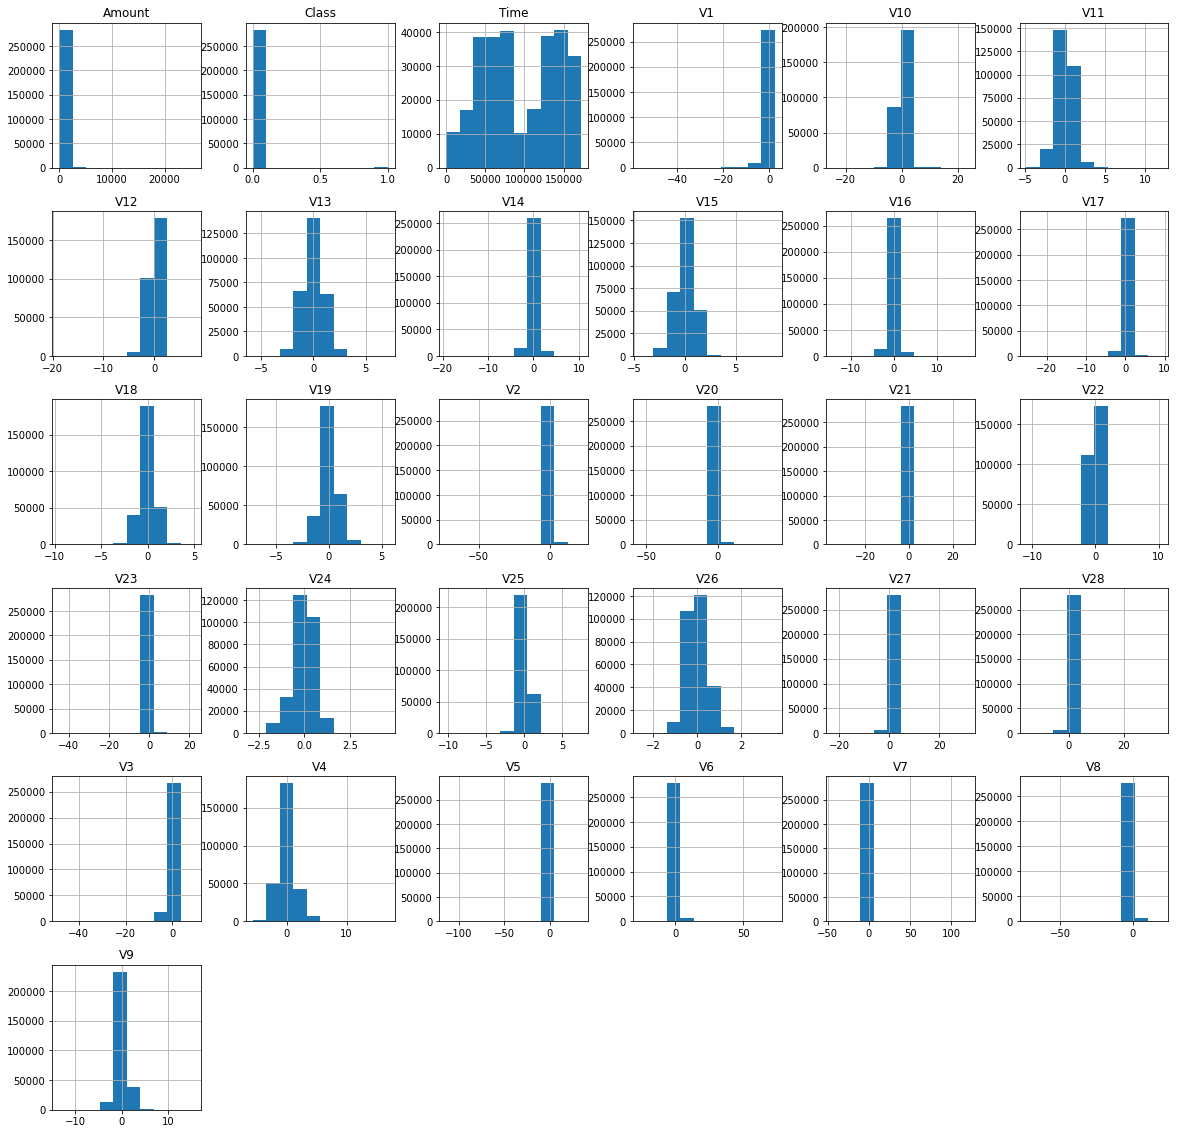

In [12]:
#data visualising
df.hist(figsize=(20,20))

In [38]:
NonFraud=len(df.Class[df["Class"]==0])
Fraud=len(df.Class[df["Class"]==1])  
X=NonFraud+Fraud

In [39]:
print("Total number of non fraud cases ",NonFraud)
print("Total number of fraud cases ",Fraud)

Total number of non fraud cases  284315
Total number of fraud cases  492


In [59]:
print("Percentage of fraud transactions {} %".format(round((Fraud/NonFraud *100),4)))

Percentage of fraud transactions 0.173 %


In [107]:
outlier_fraction=round((Fraud/NonFraud *100),4)

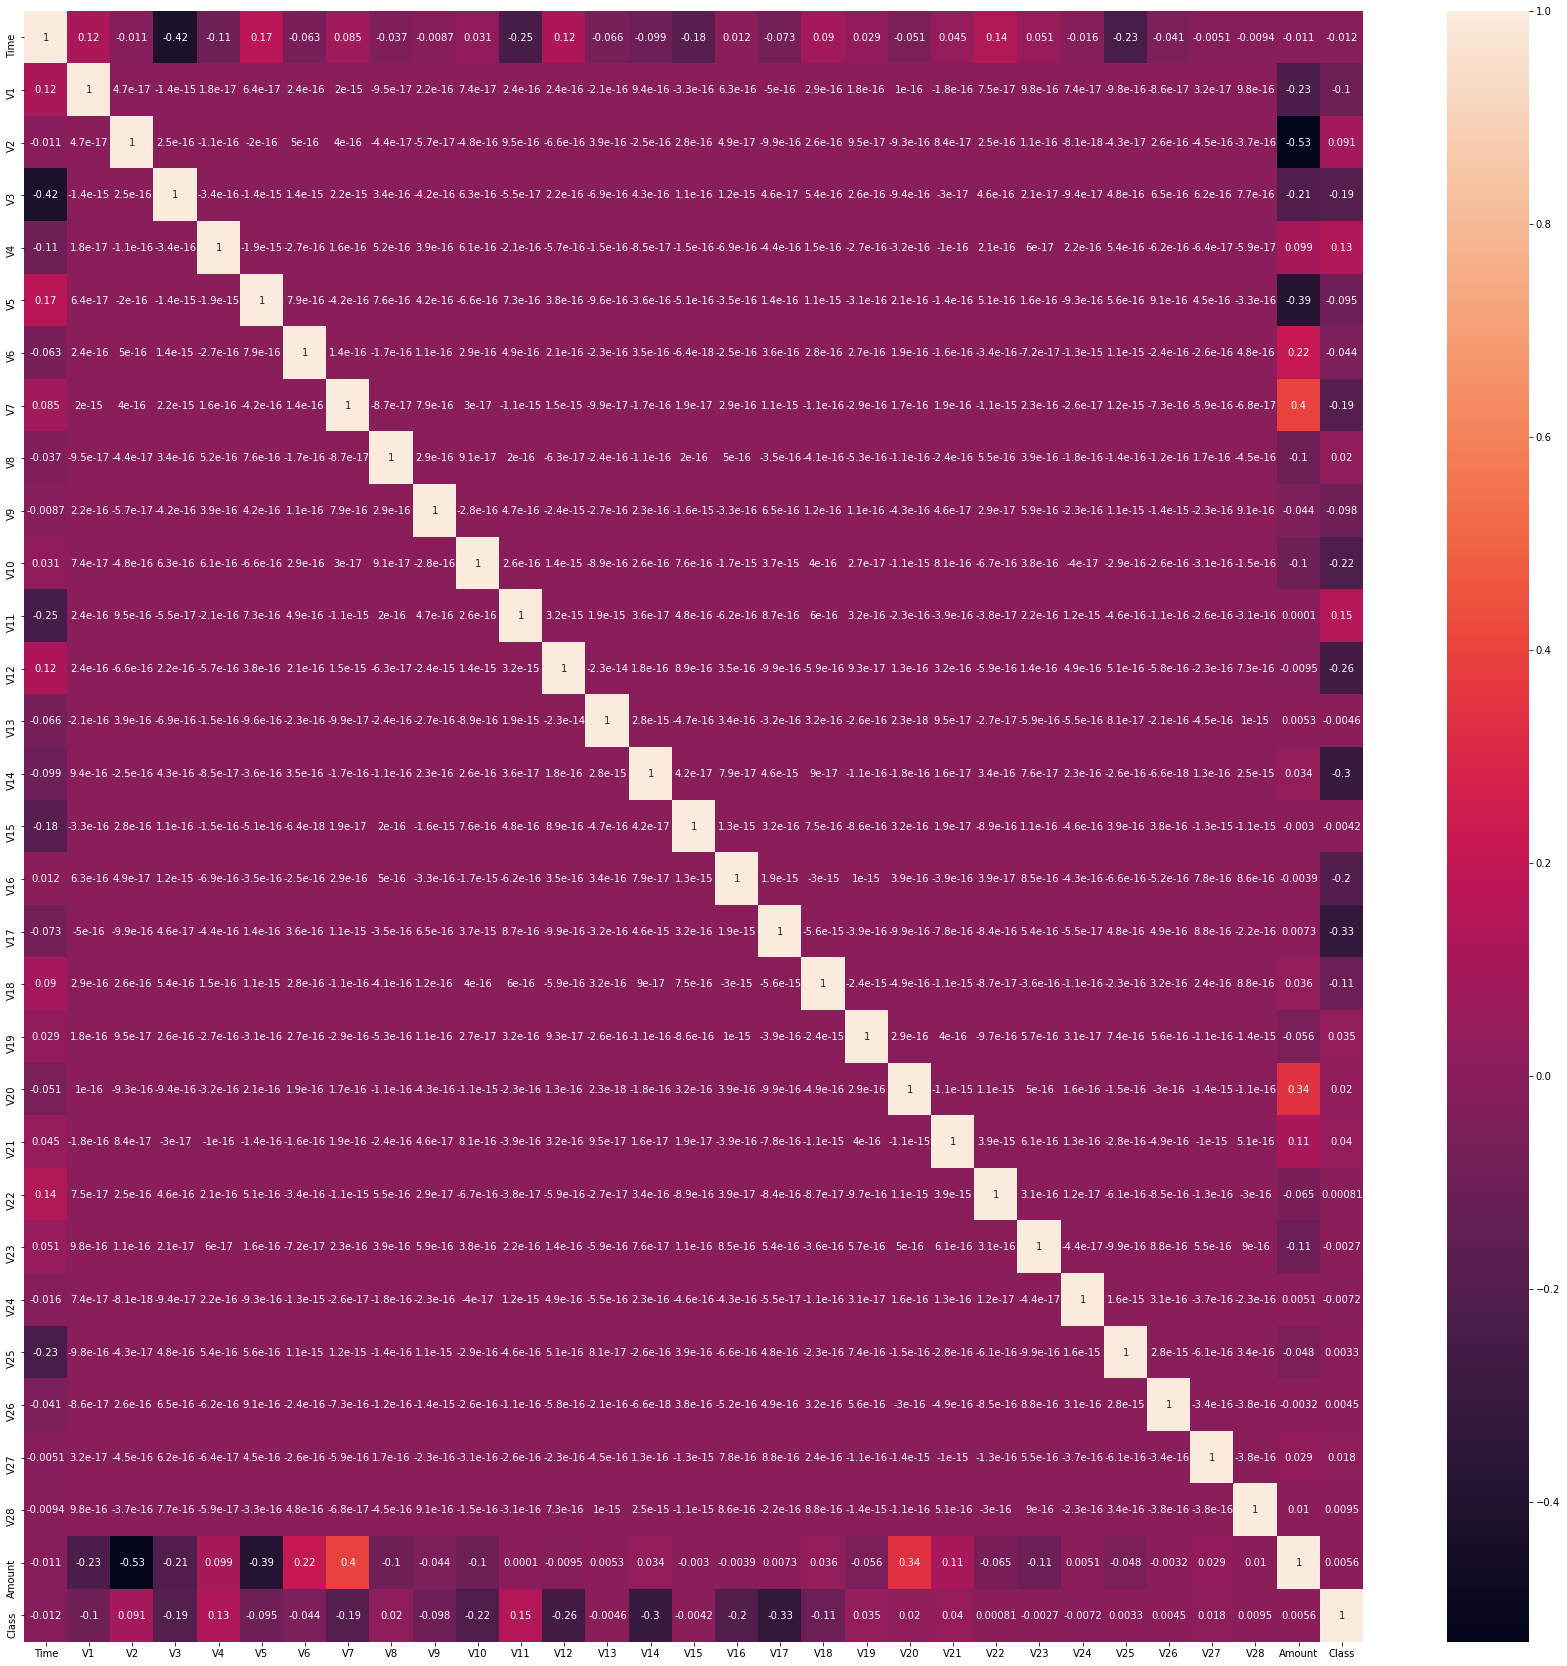

In [25]:
fig = plt.figure(figsize = (30, 30))

sns.heatmap(df.corr(),annot=True)
plt.show()


In [ ]:
# we notice that there is no any highly correlated independent variables to remove it to avoid multi colinearity


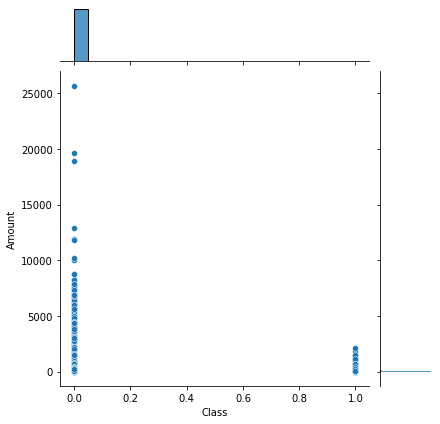

In [62]:
sns.jointplot(x="Class",y="Amount",data=df)
# All fraud transactions are done  for low amount

# Creating train and test dataset

In [63]:
from sklearn.model_selection import train_test_split

In [65]:
x_train=df.iloc[:,df.columns!="Class"]
y_train=df["Class"]

In [66]:
x_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [69]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.2)

In [70]:
from sklearn import preprocessing

In [71]:
scalar=preprocessing.StandardScaler()

In [72]:
x_train_s=scalar.fit_transform(x_train)
x_test_s=scalar.fit_transform(x_test)

# Build model

# Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression

In [195]:
from sklearn.metrics import f1_score, confusion_matrix,accuracy_score,roc_auc_score,recall_score,roc_curve,classification_report

In [76]:
log_model=LogisticRegression()
log_model.fit(x_train,y_train)

C:\Users\B.THUSHAR\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [77]:
confusion_matrix(y_train,log_model.predict(x_train))

array([[227347,    113],
       [   148,    237]], dtype=int64)

In [78]:
confusion_matrix(y_test,log_model.predict(x_test))

array([[56832,    23],
       [   40,    67]], dtype=int64)

In [97]:
print("Recall_score", round(recall_score(y_test,log_model.predict(x_test)),4))
print("Accuracy", round(accuracy_score(y_test,log_model.predict(x_test)),4))
print("Area under the roc curve",round(roc_auc_score(y_test,log_model.predict(x_test)),4))

Recall_score 0.6262
Accuracy 0.9989
Area under the roc curve 0.8129


In [101]:
print(classification_report(y_test,log_model.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56855
           1       0.74      0.63      0.68       107

    accuracy                           1.00     56962
   macro avg       0.87      0.81      0.84     56962
weighted avg       1.00      1.00      1.00     56962



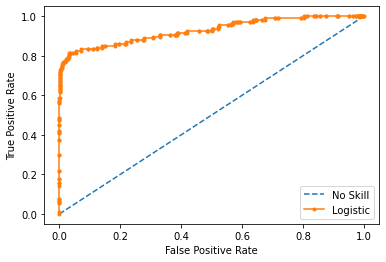

In [89]:
yhat = log_model.predict_proba(x_test)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# pos_probs = yhat
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test, pos_probs)
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# K-nearest neighbor method

In [102]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn_1 = KNeighborsClassifier(n_neighbors=1)

In [103]:
clf_knn_1.fit(x_train_s, y_train)

KNeighborsClassifier(n_neighbors=1)

In [105]:
print("Recall_score", round(recall_score(y_test,clf_knn_1.predict(x_test_s)),4))
print("Accuracy", round(accuracy_score(y_test,clf_knn_1.predict(x_test_s)),4))
print("Area under the roc curve",round(roc_auc_score(y_test,clf_knn_1.predict(x_test_s)),4))

Recall_score 0.7757
Accuracy 0.9994
Area under the roc curve 0.8878


In [106]:
confusion_matrix(y_test,clf_knn_1.predict(x_test_s))

array([[56845,    10],
       [   24,    83]], dtype=int64)

In [108]:
print(classification_report(y_test,clf_knn_1.predict(x_test_s)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56855
           1       0.89      0.78      0.83       107

    accuracy                           1.00     56962
   macro avg       0.95      0.89      0.91     56962
weighted avg       1.00      1.00      1.00     56962



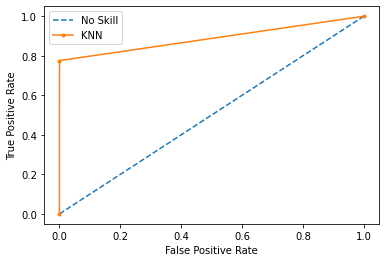

In [109]:
yhat = clf_knn_1.predict_proba(x_test_s)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# pos_probs = yhat
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test, pos_probs)
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='KNN')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# Decision Tree

In [131]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier(max_depth = 3)

In [132]:
clftree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [133]:
confusion_matrix(y_test, clftree.predict(x_test))

array([[56836,    19],
       [   33,    74]], dtype=int64)

In [134]:
print(classification_report(y_test,clftree.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56855
           1       0.80      0.69      0.74       107

    accuracy                           1.00     56962
   macro avg       0.90      0.85      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [114]:
print("Recall_score", round(recall_score(y_test,clftree.predict(x_test)),4))
print("Accuracy", round(accuracy_score(y_test,clftree.predict(x_test)),4))
print("Area under the roc curve",round(roc_auc_score(y_test,clftree.predict(x_test)),4))

Recall_score 0.6916
Accuracy 0.9991
Area under the roc curve 0.8456


In [116]:
dot_data = tree.export_graphviz(clftree, out_file=None,feature_names= x_train.columns, filled = True)
from IPython.display import Image
import pydotplus

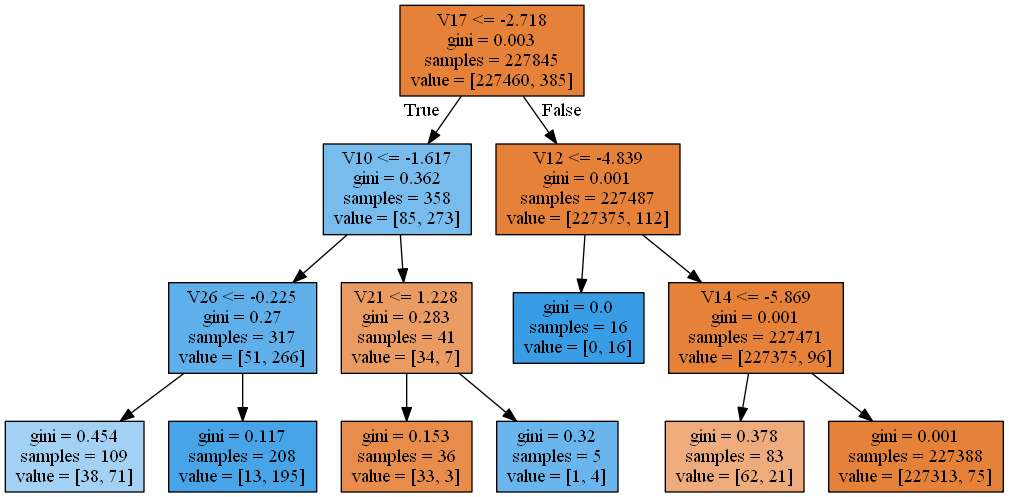

In [117]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Bagging

In [118]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier()

In [119]:
from sklearn.ensemble import BaggingClassifier

In [121]:
bag_clf = BaggingClassifier(base_estimator=clftree, n_estimators=100,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)

In [122]:
bag_clf.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  n_jobs=-1, random_state=42)

In [129]:
print(classification_report(y_test,bag_clf.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56855
           1       0.95      0.80      0.87       107

    accuracy                           1.00     56962
   macro avg       0.97      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [124]:
print("Recall_score", round(recall_score(y_test,bag_clf.predict(x_test)),4))
print("Accuracy", round(accuracy_score(y_test,bag_clf.predict(x_test)),4))
print("Area under the roc curve",round(roc_auc_score(y_test,bag_clf.predict(x_test)),4))

Recall_score 0.8037
Accuracy 0.9995
Area under the roc curve 0.9018


# Random forest

In [125]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
rf_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1 ,random_state=42)

In [127]:
rf_clf.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [128]:
print("Recall_score", round(recall_score(y_test,rf_clf.predict(x_test)),4))
print("Accuracy", round(accuracy_score(y_test,rf_clf.predict(x_test)),4))
print("Area under the roc curve",round(roc_auc_score(y_test,rf_clf.predict(x_test)),4))

Recall_score 0.785
Accuracy 0.9995
Area under the roc curve 0.8925


In [135]:
print(classification_report(y_test,rf_clf.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56855
           1       0.95      0.79      0.86       107

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



# XGboost

In [136]:
import xgboost as xgb

In [137]:
xgb_clf = xgb.XGBClassifier(max_depth=5, n_estimators=100, learning_rate=0.3,
                            n_jobs=-1)

In [138]:
xgb_clf.fit(x_train, y_train)

C:\Users\B.THUSHAR\anaconda3\envs\tensorflow_env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:18:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [139]:
print("Recall_score", round(recall_score(y_test,xgb_clf.predict(x_test)),4))
print("Accuracy", round(accuracy_score(y_test,xgb_clf.predict(x_test)),4))
print("Area under the roc curve",round(roc_auc_score(y_test,xgb_clf.predict(x_test)),4))

Recall_score 0.7757
Accuracy 0.9995
Area under the roc curve 0.8878


In [140]:
print(classification_report(y_test,xgb_clf.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56855
           1       0.97      0.78      0.86       107

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



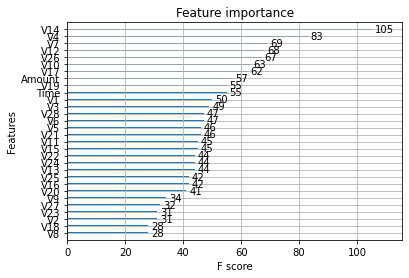

In [141]:
xgb.plot_importance(xgb_clf)

# Support vector classifier

In [142]:
from sklearn import svm

In [143]:
clf_svm_l = svm.SVC(kernel='poly', C=100)
clf_svm_l.fit(x_train_s, y_train)

SVC(C=100, kernel='poly')

In [144]:
print("Recall_score", round(recall_score(y_test,clf_svm_l.predict(x_test_s)),4))
print("Accuracy", round(accuracy_score(y_test,clf_svm_l.predict(x_test_s)),4))
print("Area under the roc curve",round(roc_auc_score(y_test,clf_svm_l.predict(x_test_s)),4))

Recall_score 0.7477
Accuracy 0.9989
Area under the roc curve 0.8735


In [145]:
print(classification_report(y_test,clf_svm_l.predict(x_test)))

              precision    recall  f1-score   support

           0       0.95      0.00      0.00     56855
           1       0.00      0.99      0.00       107

    accuracy                           0.00     56962
   macro avg       0.48      0.50      0.00     56962
weighted avg       0.95      0.00      0.00     56962



#  Unsupervised learning
# IsolationForest

In [173]:
from sklearn.ensemble import IsolationForest


In [174]:
clf_isf=IsolationForest(max_samples=X,contamination=outlier_fraction/100) # max_samples = total number of data used
clf_isf.fit(x_train,y_train)

IsolationForest(contamination=0.0017299999999999998, max_samples=28481)

In [166]:
clf_isf.decision_function(x_train)

array([0.07426576, 0.11127791, 0.12371668, ..., 0.14489505, 0.10135122,
       0.11104711])

In [175]:
y_pred=clf_isf.predict(x_test)

In [176]:
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

In [177]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56855
           1       0.33      0.32      0.33       107

    accuracy                           1.00     56962
   macro avg       0.67      0.66      0.66     56962
weighted avg       1.00      1.00      1.00     56962



In [178]:
print("Recall_score", round(recall_score(y_test,y_pred),4))
print("Accuracy", round(accuracy_score(y_test,y_pred),4))
print("Area under the roc curve",round(roc_auc_score(y_test,y_pred),4))

Recall_score 0.3178
Accuracy 0.9975
Area under the roc curve 0.6583


# Local Outlier Factor

In [188]:
from sklearn.neighbors import LocalOutlierFactor

In [189]:
clf_lof=LocalOutlierFactor(n_neighbors=20,contamination=outlier_fraction/100)

In [190]:
clf_lof.fit(x_train,y_train)

LocalOutlierFactor(contamination=0.0017299999999999998)

In [191]:
y_pred=clf_lof.fit_predict(x_test)

In [192]:
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

In [193]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56855
           1       0.01      0.01      0.01       107

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



In [194]:
print("Recall_score", round(recall_score(y_test,y_pred),4))
print("Accuracy", round(accuracy_score(y_test,y_pred),4))
print("Area under the roc curve",round(roc_auc_score(y_test,y_pred),4))

Recall_score 0.0093
Accuracy 0.9964
Area under the roc curve 0.5038
